In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 0.Загрузите датасет для предсказани цены квартиры в зависимости от ряда признаков.

In [2]:
df =pd.read_csv('train.csv')

In [3]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [4]:
df.shape[0]

10000

### 1.Постройте круговую диаграмму для признака Rooms, иллюстрирующую количество квартир в процентах в зависимости от количества комнат. Сделайте сектор с наибольшим числом квартир выдвинутым.

In [5]:
rooms = list(df['Rooms'].unique())
rooms

[3.0, 1.0, 2.0, 4.0, 5.0, 10.0, 0.0, 19.0, 6.0]

In [6]:
parts = [df[df['Rooms'] == rooms[i]].shape[0] for i in range(len(rooms))]
parts

[2235, 3705, 3880, 150, 18, 2, 8, 1, 1]

In [7]:
explode = tuple([0.05 if parts[i] == max(parts) else 0 for i in range(len(parts))])

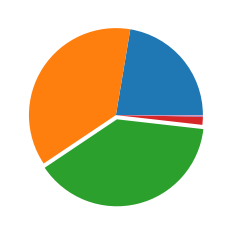

In [8]:
plt.pie(parts,explode=explode);

### 2. Постройте гистограмму целевой переменной Price. Оцените визуально, по какой цене продаётся наибольшее количество квартир.

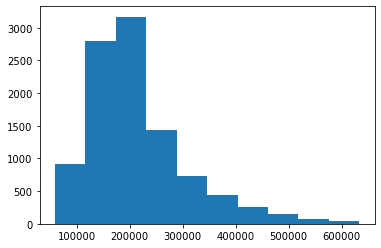

In [9]:
plt.hist(df['Price']);

 Наибольшие продажи по цене 200 000

### 3.Постройте диаграммы рассеяния для признаков Rooms, Square, HouseFloor, HouseYear в зависимости от целевой переменной Price в одной области fiagure(). Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.

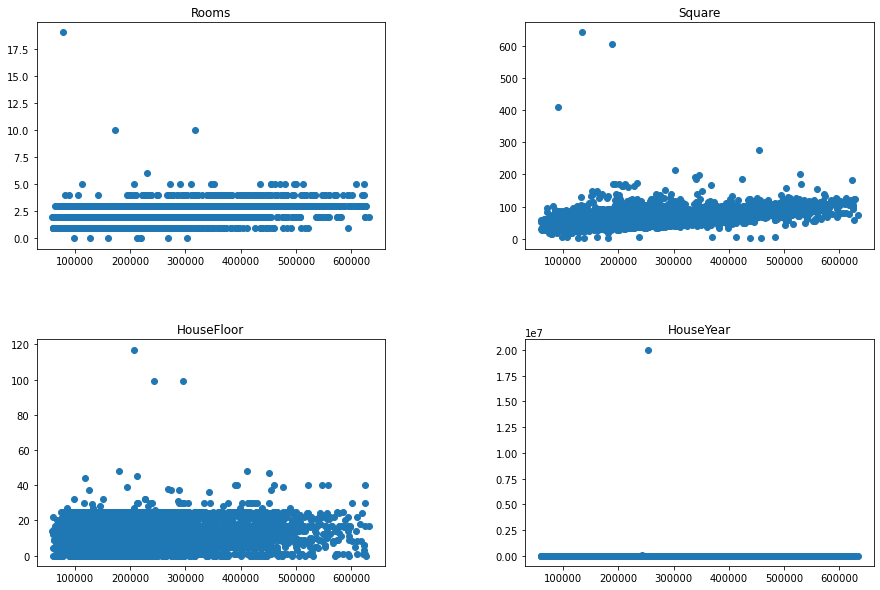

In [10]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax[0,0].set_title('Rooms')
ax[0,1].set_title('Square')
ax[1,0].set_title('HouseFloor')
ax[1,1].set_title('HouseYear')



ax[0,0].scatter(y = df['Rooms'], x = df['Price'])
ax[0,1].scatter(y = df['Square'], x = df['Price'])
ax[1,0].scatter(y = df['HouseFloor'], x = df['Price'])
ax[1,1].scatter(y = df['HouseYear'], x = df['Price'])

plt.show();

In [11]:

df['HouseYear'].unique()

array([    2014,     1966,     1988,     1977,     1972,     1968,
           1986,     2008,     1978,     2012,     1969,     2003,
           1981,     1962,     2015,     2018,     1976,     1985,
           1960,     2019,     1974,     1956,     1963,     1961,
           1979,     2006,     1953,     1973,     1982,     1965,
           2007,     2013,     1983,     1995,     1971,     2017,
           1964,     1991,     1990,     2016,     2011,     1984,
           1993,     1997,     2009,     1975,     2010,     1987,
           1935,     1970,     1967,     1989,     1959,     1996,
           2005,     1994,     1958,     2004,     1998,     1992,
           1980,     2000,     2002,     1954,     2001,     1999,
           1917,     1955,     1957,     1934,     2020,     1932,
           1942,     1940,     1937,     1941,     1939,     1931,
           1951,     1912,     1918,     1952,     1919,     1936,
           1930,     1938,     1950,     1933,     1929,     1

In [12]:
df = df[(df['HouseYear'] != 20052011) & (df['HouseYear'] !=4968)]

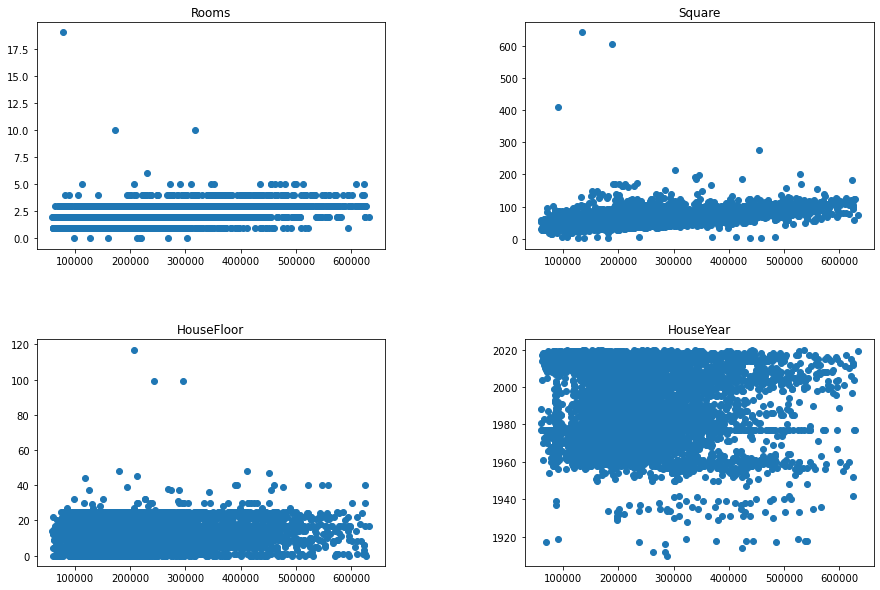

In [13]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)#Высота и ширина между графиками
ax[0,0].set_title('Rooms')
ax[0,1].set_title('Square')
ax[1,0].set_title('HouseFloor')
ax[1,1].set_title('HouseYear')



ax[0,0].scatter(y = df['Rooms'], x = df['Price'])
ax[0,1].scatter(y = df['Square'], x = df['Price'])
ax[1,0].scatter(y = df['HouseFloor'], x = df['Price'])
ax[1,1].scatter(y = df['HouseYear'], x = df['Price'])

plt.show();

### 4.Постройте ядерную оценку плотности целевой переменной Price. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной Price и признака HouseFloor, затем оцените визуально на каких этажах и по какой цене продаётся основная масса квартир

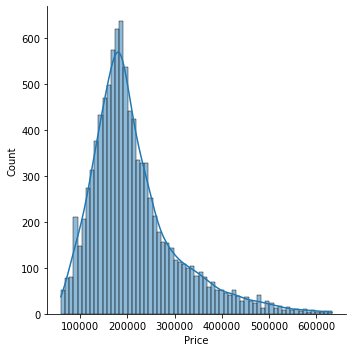

In [14]:
sns.displot(x=df['Price'], kde=True)

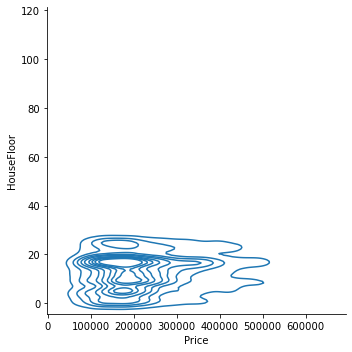

In [15]:
sns.displot(x="Price",
            y="HouseFloor",
            kind='kde',
            data=df);

###  5.Постройте ящиковую диаграмму признака Square. Оцените визуально имеются ли выбросы, и, если да, то начиная с какого размера площади значение признака можно считать выбросом.

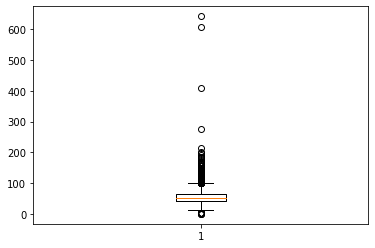

In [16]:
plt.boxplot(df['Square']);

Выбросы есть

In [17]:
quan_1 =np.quantile(df['Square'],0.25)
quan_3 =np.quantile(df['Square'],0.75)
diff_quantile = quan_3-quan_1

In [18]:
print(f"Значение является выбросом, если больше, чем {quan_3 + 1.5*diff_quantile} или меньше, чем {quan_1 - 1.5*diff_quantile}")

Значение является выбросом, если больше, чем 102.09282324572865 или меньше, чем 5.586681399795204


### 6.При помощи сетки графиков PairGrid визуализируйте попарные отношения признаков Rooms, Square, HouseFloor, HouseYear, Price следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния. По результатам визуализации сделайте выводы (аналогичные п.2,3,4).

https://seaborn.pydata.org/generated/seaborn.PairGrid.html

*Здесь мы просто передаем датафрейм, и у нас строится сетка по парам из кол-во столбцов, что есть в датасете

In [19]:
df.shape

(9998, 20)

In [20]:
df_pairs = pd.concat([df['Rooms'],df['Square'],df['HouseFloor'],df['HouseYear'],df['Price']],axis = 1)

In [21]:
df_pairs = df_pairs[(df_pairs['HouseYear'] != 20052011) & (df_pairs['HouseYear'] !=4968)]

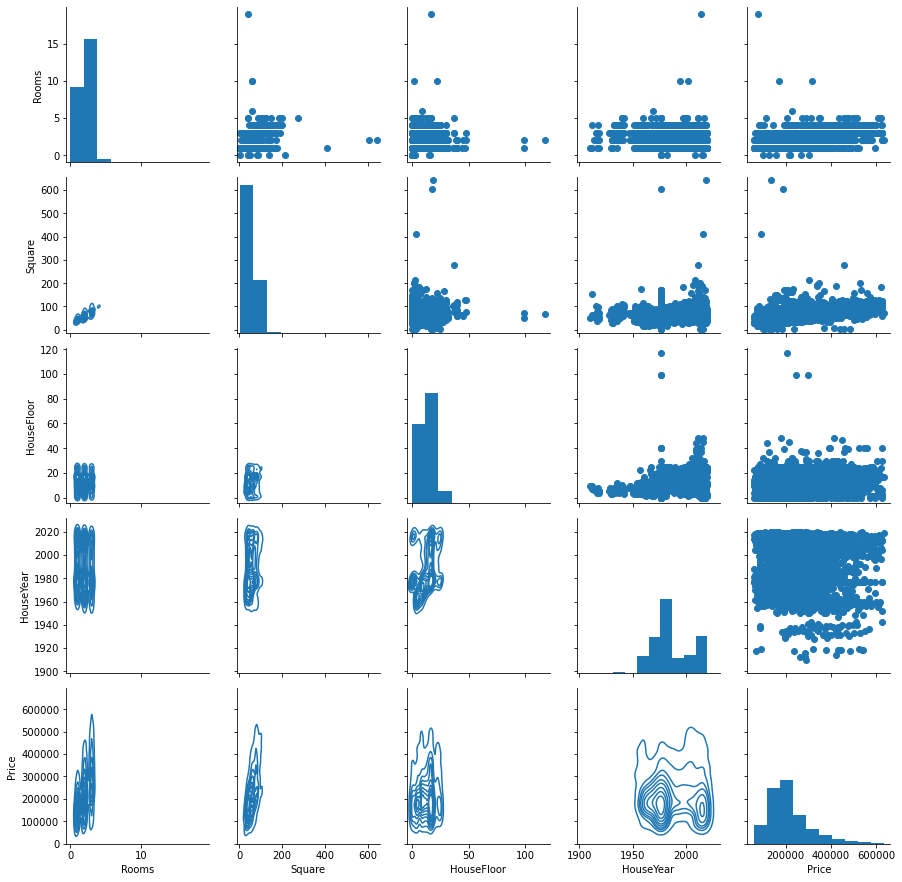

In [22]:
g = sns.PairGrid(df_pairs)
g.map_upper(plt.scatter)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)

### 7.Постройте тепловую карту матрицы корреляции (df.corr()) признаков Rooms, Square, HouseFloor, HouseYear, Price. По ней определите, какие признаки являются зависимыми (у таких признаков коэффициент корреляции близок к единице).

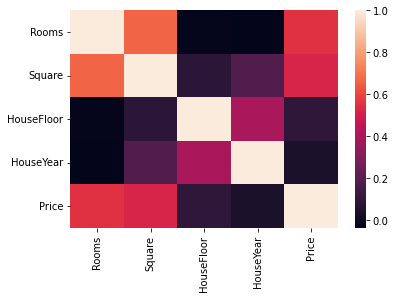

In [23]:
sns.heatmap(df_pairs.corr());

### Дополнительные задания:
##### Постройте график jointplot (гибрид scatterplot и histogram) из библиотеки seaborn.
#### Постройте график violinplot (гибрид boxplot и ядерной оценки плотности) из библиотеки seaborn.
#### Поработайте с сеткой подзаголовков FacetGrid.

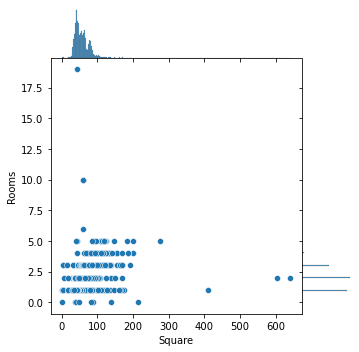

In [24]:
sns.jointplot(x = "Square", y = 'Rooms',
               kind='scatter', data =df, height=5,ratio=5,space=0)

<AxesSubplot:xlabel='Rooms', ylabel='Floor'>

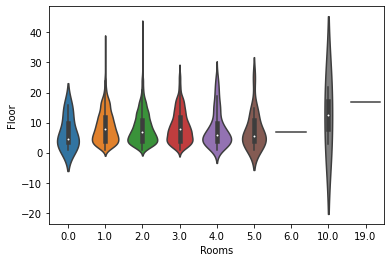

In [25]:
sns.violinplot(x=df['Rooms'], y = df['Floor'])

<AxesSubplot:xlabel='Price'>

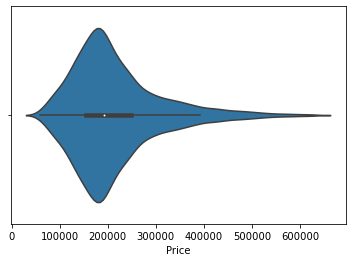

In [26]:
sns.violinplot(x=df['Price'])